# Herpetofauna of Steele Creek Park

This notebook explores data from the following publication:

> **Jessee, L.D., Stout, J.B., & McMeen, J.N. (2022).** Herpetofauna of Steele Creek Park (Sullivan County, TN), with Comments on Species–Area Relationships of Amphibians and Reptiles in Eastern Tennessee. *Southeastern Naturalist*, 21(1), 63-73.

**Abstract:** Steele Creek Park, a large municipal park in Sullivan County in northeastern Tennessee, has had nearly continuous observations of natural history data from trained naturalists for more than half a century. Here, we present a herpetofaunal list of species for the park that comprises: 10 species of frogs, 11 species of salamanders, 2 species of lizards, 11 species of snakes, and 7 species of turtles. The inventory includes 10 species previously unreported in Sullivan County. We then compared the park data with increasingly larger land areas in eastern Tennessee to establish a regional species–area curve for herpetofaunal richness that could have predictive capabilities for similar sites in the southern Appalachians.

---

Steele Creek Park is a 9.259-km² municipal park located in Sullivan County in northeastern Tennessee, near the Virginia border and within the Ridge and Valley physiographic province of the southern Appalachians. The majority of the park (~8 km²) is undeveloped and within the Beaver Creek Knobs. The area in and around Slagle Creek, called Slagle Hollow, is a registered Tennessee State Natural Area. Geographically, nearly all of the park and Beaver Creek Knobs are surrounded by developed areas, creating an island of steep, forested, shale knobs—an "island in the city" that is a prime spot for biogeographical research.

The species–area relationship (SAR) has been referred to as the "closest thing there is to a law in ecology" and states that as habitat area increases so too does species richness, at a predictable rate. This study compiled a herpetofaunal species list for the park and established species–area relationships for amphibians and reptiles across nested sampling areas from Steele Creek Park to all of eastern Tennessee.

Here are some code examples that explore the data used in this project. First, let's import some libraries we will use in the code blocks below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now, let's create a DataFrame with the species-area data from Table 1 in the publication. This data represents a nested sample of increasingly larger land areas: Steele Creek Park, Sullivan County, the 5-county area of northeastern Tennessee, and all of eastern Tennessee.

In [2]:
# Create DataFrame from Table 1 in Jessee et al. (2022)
data = {
    'Locality': ['Steele Creek Park', 'Sullivan County', 'Northeastern Tennessee', 'Eastern Tennessee'],
    'Area': [9.3, 1114, 4137, 37438],
    'TotalHerpetofauna': [41, 59, 68, 113],
    'Amphibians': [20, 38, 44, 69],
    'Reptiles': [21, 21, 24, 44]
}

df = pd.DataFrame(data)
display(df)

,Locality,Area,TotalHerpetofauna,Amphibians,Reptiles
0,Steele Creek Park,9.3,41,20,21
1,Sullivan County,1114.0,59,38,21
2,Northeastern Tennessee,4137.0,68,44,24
3,Eastern Tennessee,37438.0,113,69,44


Now we can create a scatter plot to visualize the herpetofaunal data across the nested sample areas.

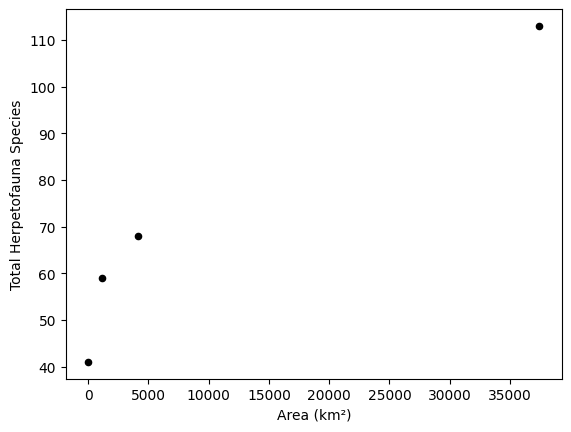

In [3]:
# plot the scatter plot using pyplot and the Pandas builtin wrapper for pyplot
df.plot.scatter(x='Area', y='TotalHerpetofauna', color='black')
plt.xlabel('Area (km²)')
plt.ylabel('Total Herpetofauna Species')
plt.show()

To model the SAR, species richness and geographical area samples were logarithmically (log10) transformed, and a regression analysis was performed. The species–area curve was flattened by taking the log10 values for both species and land area and plotted as a linear regression. The regression equation from Figure 2 in the publication for total herpetofauna is $y = 0.1137x + 1.4704$. Here is an example of the process.

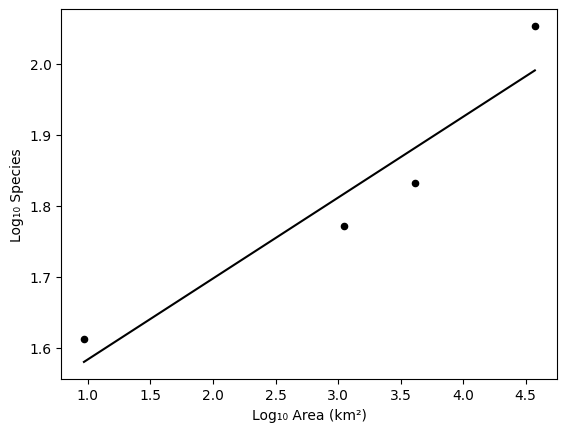

Total Herpetofauna regression line: y = 0.1138x + 1.4701


In [4]:
# create and populate log10 columns based on existing columns
df['Log10Area'] = np.log10(df['Area'])
df['Log10TotalHerpetofauna'] = np.log10(df['TotalHerpetofauna'])

# fit a linear regression line and getting the slope and y-intercept
m_herps, b_herps = np.polyfit(df['Log10Area'], df['Log10TotalHerpetofauna'], 1)

# add the series values and the regression line to the scatter plot
fig, ax = plt.subplots()
df.plot.scatter(x='Log10Area', y='Log10TotalHerpetofauna', color='black', ax=ax)
plt.plot(df['Log10Area'], m_herps * df['Log10Area'] + b_herps, color='black')
plt.xlabel('Log₁₀ Area (km²)')
plt.ylabel('Log₁₀ Species')
plt.show()

# Print the model derived from the regression
print(f'Total Herpetofauna regression line: y = {m_herps:0.4f}x + {b_herps:0.4f}')

The study also calculated separate regression models for amphibians and reptiles. According to Figure 2 in the publication:
- **Amphibians:** $y = 0.1449x + 1.1488$ (Adj. $R^2 = 0.98$, $P = 0.006$)
- **Reptiles:** $y = 0.0747x + 1.189$ (Adj. $R^2 = 0.33$, $P = 0.257$)

The amphibian model shows a much stronger fit than the reptile model, suggesting that amphibian richness adheres more closely to the species–area relationship than reptiles in this region. Let's plot all three groups together.

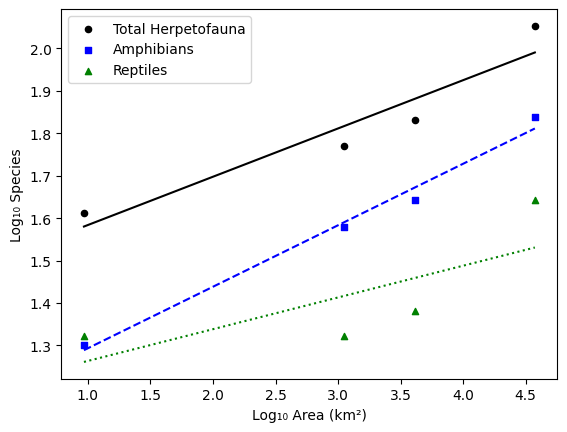

Total Herpetofauna regression line: y = 0.1138x + 1.4701
Amphibians regression line: y = 0.1449x + 1.1485
Reptiles regression line: y = 0.0748x + 1.1888


In [5]:
# create and populate log10 columns for amphibians and reptiles
df['Log10Amphibians'] = np.log10(df['Amphibians'])
df['Log10Reptiles'] = np.log10(df['Reptiles'])

# fitting a linear regression line and getting the slope and y-intercept
m_amphibians, b_amphibians = np.polyfit(df['Log10Area'], df['Log10Amphibians'], 1)
m_reptiles, b_reptiles = np.polyfit(df['Log10Area'], df['Log10Reptiles'], 1)

# adding the regression line to the scatter plot
fig, ax = plt.subplots()
df.plot.scatter(x='Log10Area', y='Log10TotalHerpetofauna', color='black', label='Total Herpetofauna', ax=ax)
df.plot.scatter(x='Log10Area', y='Log10Amphibians', color='blue', marker='s', label='Amphibians', ax=ax)
df.plot.scatter(x='Log10Area', y='Log10Reptiles', color='green', marker='^', label='Reptiles', ax=ax)
plt.plot(df['Log10Area'], m_herps * df['Log10Area'] + b_herps, color='black')
plt.plot(df['Log10Area'], m_amphibians * df['Log10Area'] + b_amphibians, color='blue', linestyle='--')
plt.plot(df['Log10Area'], m_reptiles * df['Log10Area'] + b_reptiles, color='green', linestyle=':')
plt.xlabel('Log₁₀ Area (km²)')
plt.ylabel('Log₁₀ Species')
plt.legend()
plt.show()

# Print the models derived from the regressions
print(f'Total Herpetofauna regression line: y = {m_herps:0.4f}x + {b_herps:0.4f}')
print(f'Amphibians regression line: y = {m_amphibians:0.4f}x + {b_amphibians:0.4f}')
print(f'Reptiles regression line: y = {m_reptiles:0.4f}x + {b_reptiles:0.4f}')

The regression model can be used to predict species richness for a given land area. Using the power model $S = CA^z$ where $C = 10^b$ (the y-intercept) and $z$ is the slope, we can create predictive functions. Let's use the published regression values from Figure 2 to create prediction functions and plot the SAR curves in arithmetic space.

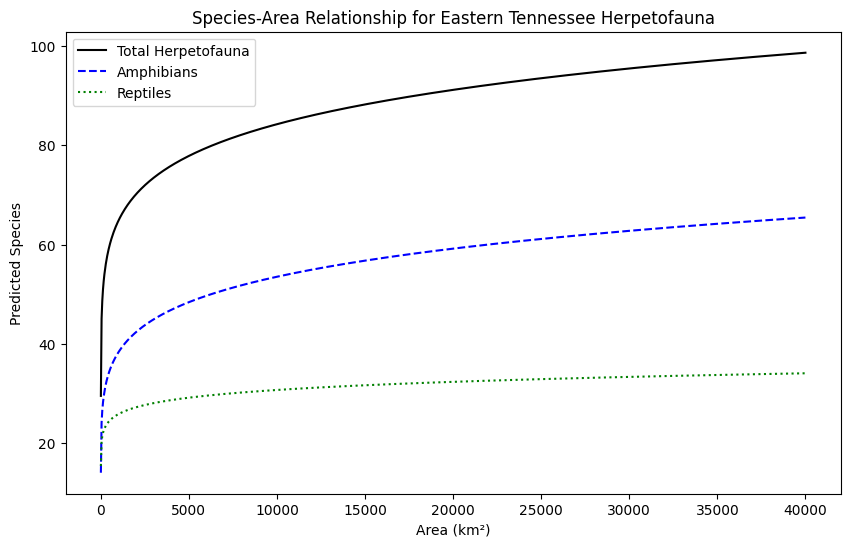

In [6]:
# Define predictive models using published regression values from Figure 2
# Total Herpetofauna: y = 0.1137x + 1.4704, so S = 10^1.4704 * A^0.1137 = 29.55 * A^0.1137
# Amphibians: y = 0.1449x + 1.1488, so S = 10^1.1488 * A^0.1449 = 14.09 * A^0.1449
# Reptiles: y = 0.0747x + 1.189, so S = 10^1.189 * A^0.0747 = 15.45 * A^0.0747

def total_herpetofauna(area):
    return 29.55 * area ** 0.1137

def amphibians(area):
    return 14.09 * area ** 0.1449

def reptiles(area):
    return 15.45 * area ** 0.0747

# create an array of areas from 1.0 to 40000.0
areas = np.linspace(1.0, 40000.0, num=1000, endpoint=True)

# for each area calculate the estimated species
herp_species = [total_herpetofauna(a) for a in areas]
amphibian_species = [amphibians(a) for a in areas]
reptile_species = [reptiles(a) for a in areas]

# plot the data
plt.figure(figsize=(10, 6))
plt.plot(areas, herp_species, color='black', label='Total Herpetofauna')
plt.plot(areas, amphibian_species, color='blue', linestyle='--', label='Amphibians')
plt.plot(areas, reptile_species, color='green', linestyle=':', label='Reptiles')
plt.xlabel('Area (km²)')
plt.ylabel('Predicted Species')
plt.title('Species-Area Relationship for Eastern Tennessee Herpetofauna')
plt.legend()
plt.show()

Let's use the model to make predictions and compare with actual observations. The paper tested the model against sites like Great Smoky Mountains National Park (2114 km²) and Cumberland Gap National Park (82.74 km²).

In [7]:
# Test the model with known sites from the paper
# Great Smoky Mountains NP: 2114 km², reported 43 amphibians and 38 reptiles (81 total)
# Cumberland Gap NP: 82.74 km², reported 28 amphibians and 20 reptiles (48 total)

test_sites = {
    'Great Smoky Mountains NP': {'area': 2114, 'actual_amphibians': 43, 'actual_reptiles': 38},
    'Cumberland Gap NP': {'area': 82.74, 'actual_amphibians': 28, 'actual_reptiles': 20},
    'Steele Creek Park': {'area': 9.3, 'actual_amphibians': 20, 'actual_reptiles': 21}
}

print("Model Predictions vs Actual Observations")
print("=" * 70)

for site, data in test_sites.items():
    area = data['area']
    pred_amphibians = amphibians(area)
    pred_reptiles = reptiles(area)
    pred_total = total_herpetofauna(area)
    actual_total = data['actual_amphibians'] + data['actual_reptiles']
    
    print(f"\n{site} ({area} km²)")
    print(f"  Amphibians: Predicted = {pred_amphibians:.1f}, Actual = {data['actual_amphibians']}")
    print(f"  Reptiles:   Predicted = {pred_reptiles:.1f}, Actual = {data['actual_reptiles']}")
    print(f"  Total:      Predicted = {pred_total:.1f}, Actual = {actual_total}")

Model Predictions vs Actual Observations

Great Smoky Mountains NP (2114 km²)
  Amphibians: Predicted = 42.7, Actual = 43
  Reptiles:   Predicted = 27.4, Actual = 38
  Total:      Predicted = 70.6, Actual = 81

Cumberland Gap NP (82.74 km²)
  Amphibians: Predicted = 26.7, Actual = 28
  Reptiles:   Predicted = 21.5, Actual = 20
  Total:      Predicted = 48.8, Actual = 48

Steele Creek Park (9.3 km²)
  Amphibians: Predicted = 19.5, Actual = 20
  Reptiles:   Predicted = 18.3, Actual = 21
  Total:      Predicted = 38.1, Actual = 41


## Summary

The species–area relationship derived in this study provides evidence for predictability of amphibian and reptile richness per land area within temperate regions of similar geography in eastern Tennessee. Key findings include:

- **Total Herpetofauna:** The model explained 86% of the variation (Adj. R² = 0.86, P = 0.049)
- **Amphibians:** The strongest relationship, explaining 98% of variation (Adj. R² = 0.98, P = 0.006)
- **Reptiles:** Weaker relationship, explaining only 33% of variation (Adj. R² = 0.33, P = 0.257)

The amphibian model performed remarkably well when tested against Great Smoky Mountains National Park data, predicting 42.7 species compared to 43 reported. The weaker reptile relationship may be due to lower regional species richness compared to amphibians.

This newly estimated relationship has important implications for land use and conservation efforts and establishes a temporal regional baseline for herpetofaunal richness. As noted by the authors, amphibians and reptiles are ecological bellwethers, and understanding their biogeography at all scales will prove invaluable in an increasingly anthropogenically influenced, changing biosphere.